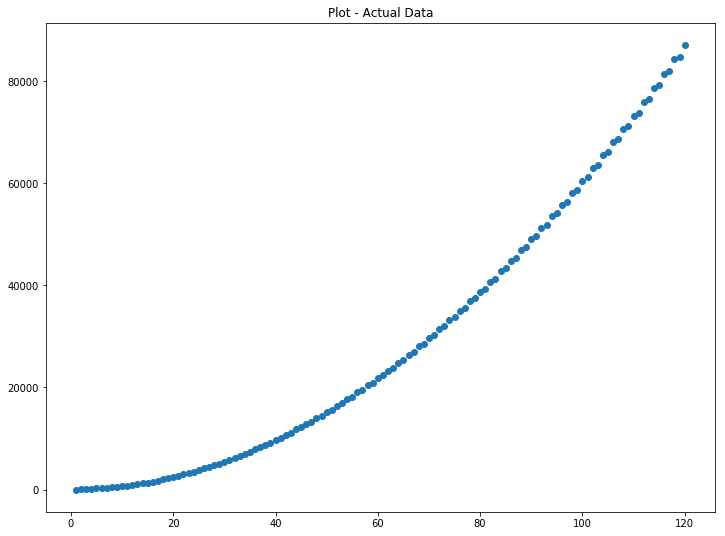

In [66]:
import pandas as pd
from scipy import stats
plt.rcParams['figure.figsize'] = (12.0, 9.0)

df=pd.read_csv("Data_Set1_Assignment5_BasicsOfDataAnalytics.csv")
X=df.iloc[:,0]
Y=df.iloc[:,1]
plt.scatter(X, Y)
plt.title("Plot - Actual Data")
plt.show()


In [67]:
df.isnull().sum()

x    0
y    0
dtype: int64

X_mean: 60.5
Y_mean: 29289.212583333345


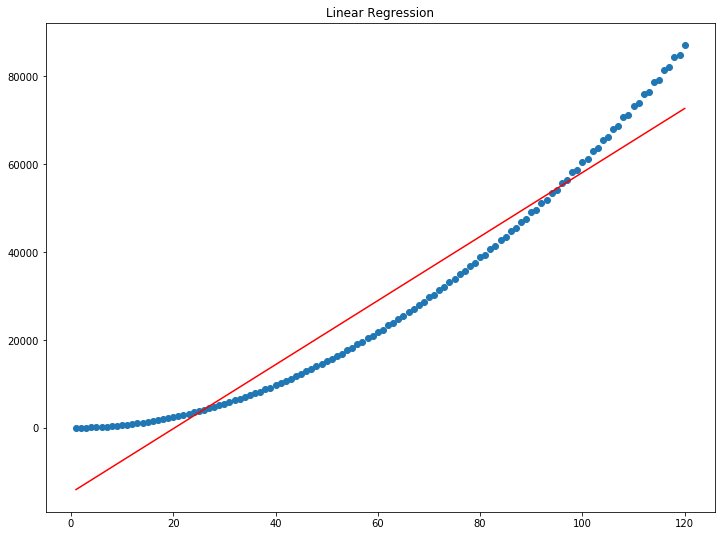

In [68]:
df.describe()

# Building the Linear regression model
X_mean = sum(X)/len(X)
Y_mean = sum(Y)/len(Y)
print('X_mean: {}'.format(X_mean))
print('Y_mean: {}'.format(Y_mean))


num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean
Y_Pred=m*X + c

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_Pred), max(Y_Pred)], color='red') # predicted
plt.title("Linear Regression")
plt.show()

In [69]:
df['Y_Pre'] = Y_Pre
Y_Cap=df.iloc[:,2]
Equation="y=%fx+%f" %(m,c)

In [70]:
#ANOVA Function - Take number of coefficients as an input.
def ANOVA(x):
    SSE=0
    SSR=0
    SST=0
    n=len(X)
    m=x
    
    #calculation Sum of square
    for i in range(n) :
      SSE += (Y[i]-Y_Cap[i])**2
      SST += (Y[i]-Y_mean)**2
      SSR += (Y_Cap[i]-Y_mean)**2
#MSR=SSR/m-1,MSE=SSE/n-m,MST=SST/n-1
    
    print('SSE : {}'.format(SSE))
    print('SST: {}'.format(SST))
    print('SSR: {}'.format(SSR))
    
    #calcultion of Mean square value
    MSR=SSR/(m-1)
    MSE=SSE/(n-m)
    MST=SST/(n-1)
    F=MSR/MSE
    print('MSR: {}'.format(MSR))
    print('MSE: {}'.format(MSE))
    print('MST: {}'.format(MST))
    print('F: {}'.format(F))
    
    l1=len(X)-1
    l2=len(Y)-1
    p=stats.f.cdf(F,l1,l2)
    p_new=str(p)
    print('P_new: {}'.format(p_new))
    Table_Data = {"Regression Equation":Equation,"MSR":MSR,"MSE":MSE,"MST":MST,"F-Stat":F,"P-Value":p_new}
    df_Anova=pd.DataFrame(data=Table_Data,index=[0])
    
    return df_Anova

In [71]:
ANOVA(2)

SSE : 4989388122.660858
SST: 81307601586.7201
SSR: 76318213464.05928
MSR: 76318213464.05928
MSE: 42282950.19204117
MST: 683257156.1909251
F: 1804.9405994008548
P_new: 0.9999999999999999


,F-Stat,MSE,MSR,MST,P-Value,Regression Equation
0,1804.940599,4.228295e+07,7.631821e+10,6.832572e+08,0.9999999999999999,y=728.027747x+-14756.466125
